## Observations and Insights 

In [348]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

from scipy.stats import linregress
from sklearn import datasets

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)



In [349]:
study_results.shape

(1893, 4)

In [350]:
study_results.columns

Index(['Mouse ID', 'Timepoint', 'Tumour Volume (mm3)', 'Metastatic Sites'], dtype='object')

In [351]:
mouse_metadata.shape

(249, 5)

In [352]:
mouse_metadata.columns

Index(['Mouse ID', 'Drug Regimen', 'Sex', 'Age_months', 'Weight (g)'], dtype='object')

In [353]:
study_results.head()

,Mouse ID,Timepoint,Tumour Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0
2,g107,0,45.0,0
3,a457,0,45.0,0
4,c819,0,45.0,0


In [354]:
mouse_metadata.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16


In [355]:
# Combine the data into a single dataset
mouse_data_merged_df= pd.merge(study_results, mouse_metadata, on="Mouse ID", how="left")

# Display the data table for preview
mouse_data_merged_df.head(3)

,Mouse ID,Timepoint,Tumour Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29


In [356]:
# Checking datatypes
mouse_data_merged_df.dtypes

Mouse ID                object
Timepoint                int64
Tumour Volume (mm3)    float64
Metastatic Sites         int64
Drug Regimen            object
Sex                     object
Age_months               int64
Weight (g)               int64
dtype: object

In [357]:
# Checking the number of mice.
mouse_data_merged_df.count()

Mouse ID               1893
Timepoint              1893
Tumour Volume (mm3)    1893
Metastatic Sites       1893
Drug Regimen           1893
Sex                    1893
Age_months             1893
Weight (g)             1893
dtype: int64

In [358]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
test_df = mouse_data_merged_df.duplicated(subset=['Mouse ID', 'Timepoint'])
mouse_data_merged_df["Duplicated_Entry"] = test_df
mouse_data_merged_df.head()

,Mouse ID,Timepoint,Tumour Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g),Duplicated_Entry
0,b128,0,45.0,0,Capomulin,Female,9,22,False
1,f932,0,45.0,0,Ketapril,Male,15,29,False
2,g107,0,45.0,0,Ketapril,Female,2,29,False
3,a457,0,45.0,0,Ketapril,Female,11,30,False
4,c819,0,45.0,0,Ketapril,Male,21,25,False


In [359]:
duplicate_data_df = mouse_data_merged_df.loc[mouse_data_merged_df["Duplicated_Entry"] == True]
duplicate_data_df.count()

Mouse ID               5
Timepoint              5
Tumour Volume (mm3)    5
Metastatic Sites       5
Drug Regimen           5
Sex                    5
Age_months             5
Weight (g)             5
Duplicated_Entry       5
dtype: int64

### # Optional: Get all the data for the duplicate mouse ID. 

In [360]:
# groupby duplicated 5x enteries and indentify Mouse ID
duplicate_mouse_data_df = duplicate_data_df.groupby("Mouse ID")
duplicate_mouse_data_df.head(10)

,Mouse ID,Timepoint,Tumour Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g),Duplicated_Entry
137,g989,0,45.000000,0,Propriva,Female,21,26,True
360,g989,5,47.570392,0,Propriva,Female,21,26,True
681,g989,10,49.880528,0,Propriva,Female,21,26,True
869,g989,15,53.442020,0,Propriva,Female,21,26,True
1111,g989,20,54.657650,1,Propriva,Female,21,26,True


In [361]:
duplicate_data_df = mouse_data_merged_df.loc[mouse_data_merged_df["Mouse ID"] == "g989"]
duplicate_data_df

,Mouse ID,Timepoint,Tumour Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g),Duplicated_Entry
107,g989,0,45.000000,0,Propriva,Female,21,26,False
137,g989,0,45.000000,0,Propriva,Female,21,26,True
329,g989,5,48.786801,0,Propriva,Female,21,26,False
360,g989,5,47.570392,0,Propriva,Female,21,26,True
620,g989,10,51.745156,0,Propriva,Female,21,26,False
681,g989,10,49.880528,0,Propriva,Female,21,26,True
815,g989,15,51.325852,1,Propriva,Female,21,26,False
869,g989,15,53.442020,0,Propriva,Female,21,26,True
950,g989,20,55.326122,1,Propriva,Female,21,26,False
1111,g989,20,54.657650,1,Propriva,Female,21,26,True


In [362]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
cleaned_mouse_data_merged_df = mouse_data_merged_df.drop_duplicates(subset=['Mouse ID', 'Timepoint'],keep='last')
cleaned_mouse_data_merged_df.loc[mouse_data_merged_df["Mouse ID"] == "g989"]

,Mouse ID,Timepoint,Tumour Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g),Duplicated_Entry
137,g989,0,45.000000,0,Propriva,Female,21,26,True
360,g989,5,47.570392,0,Propriva,Female,21,26,True
681,g989,10,49.880528,0,Propriva,Female,21,26,True
869,g989,15,53.442020,0,Propriva,Female,21,26,True
1111,g989,20,54.657650,1,Propriva,Female,21,26,True
1195,g989,25,56.045564,1,Propriva,Female,21,26,False
1380,g989,30,59.082294,1,Propriva,Female,21,26,False
1592,g989,35,62.570880,2,Propriva,Female,21,26,False


In [363]:
# Checking the number of mice in the clean DataFrame.
cleaned_mouse_data_merged_df.count()

Mouse ID               1888
Timepoint              1888
Tumour Volume (mm3)    1888
Metastatic Sites       1888
Drug Regimen           1888
Sex                    1888
Age_months             1888
Weight (g)             1888
Duplicated_Entry       1888
dtype: int64

# Summary Statistics
### Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
### mean, median, variance, standard deviation, and SEM of the tumour volume. 
### Assemble the resulting series into a single summary dataframe.

In [364]:
cleaned_mouse_data_merged_df.dtypes

Mouse ID                object
Timepoint                int64
Tumour Volume (mm3)    float64
Metastatic Sites         int64
Drug Regimen            object
Sex                     object
Age_months               int64
Weight (g)               int64
Duplicated_Entry          bool
dtype: object

In [365]:
gr_summary_regimen_df = cleaned_mouse_data_merged_df.groupby(["Drug Regimen"])
print(gr_summary_regimen_df)
gr_summary_regimen_df.count().head(15)

,Mouse ID,Timepoint,Tumour Volume (mm3),Metastatic Sites,Sex,Age_months,Weight (g),Duplicated_Entry
Drug Regimen,,,,,,,,
Capomulin,230,230,230,230,230,230,230,230
Ceftamin,178,178,178,178,178,178,178,178
Infubinol,178,178,178,178,178,178,178,178
Ketapril,188,188,188,188,188,188,188,188
Naftisol,186,186,186,186,186,186,186,186
Placebo,181,181,181,181,181,181,181,181
Propriva,156,156,156,156,156,156,156,156
Ramicane,228,228,228,228,228,228,228,228
Stelasyn,181,181,181,181,181,181,181,181


In [366]:
gr_summary_regimen_df.dtypes

,Mouse ID,Timepoint,Tumour Volume (mm3),Metastatic Sites,Sex,Age_months,Weight (g),Duplicated_Entry
Drug Regimen,,,,,,,,
Capomulin,object,int64,float64,int64,object,int64,int64,bool
Ceftamin,object,int64,float64,int64,object,int64,int64,bool
Infubinol,object,int64,float64,int64,object,int64,int64,bool
Ketapril,object,int64,float64,int64,object,int64,int64,bool
Naftisol,object,int64,float64,int64,object,int64,int64,bool
Placebo,object,int64,float64,int64,object,int64,int64,bool
Propriva,object,int64,float64,int64,object,int64,int64,bool
Ramicane,object,int64,float64,int64,object,int64,int64,bool
Stelasyn,object,int64,float64,int64,object,int64,int64,bool


In [453]:
# create a DataFrame using groupby Drug Regimen
drug_regimen_indexed = cleaned_mouse_data_merged_df.set_index("Drug Regimen")
gr_summary_regimen_df = drug_regimen_indexed.groupby(["Drug Regimen"])

gr_summary_regimen_df.count().head(15)

,Mouse ID,Timepoint,Tumour Volume (mm3),Metastatic Sites,Sex,Age_months,Weight (g),Duplicated_Entry
Drug Regimen,,,,,,,,
Capomulin,230,230,230,230,230,230,230,230
Ceftamin,178,178,178,178,178,178,178,178
Infubinol,178,178,178,178,178,178,178,178
Ketapril,188,188,188,188,188,188,188,188
Naftisol,186,186,186,186,186,186,186,186
Placebo,181,181,181,181,181,181,181,181
Propriva,156,156,156,156,156,156,156,156
Ramicane,228,228,228,228,228,228,228,228
Stelasyn,181,181,181,181,181,181,181,181


In [431]:
#Calculate the mean
regimen_mean = gr_summary_regimen_df["Tumour Volume (mm3)"].mean()
regimen_mean
#print('Mean per Drug Regimens: {:,.2F}'.format(regimen_mean))

Drug Regimen
Capomulin    40.675741
Ceftamin     52.591172
Infubinol    52.884795
Ketapril     55.235638
Naftisol     54.331565
Placebo      54.033581
Propriva     52.382993
Ramicane     40.216745
Stelasyn     54.233149
Zoniferol    53.236507
Name: Tumour Volume (mm3), dtype: float64

In [432]:
#Calculate the median
regimen_median = gr_summary_regimen_df["Tumour Volume (mm3)"].median()
regimen_median

Drug Regimen
Capomulin    41.557809
Ceftamin     51.776157
Infubinol    51.820584
Ketapril     53.698743
Naftisol     52.509285
Placebo      52.288934
Propriva     50.783528
Ramicane     40.673236
Stelasyn     52.431737
Zoniferol    51.818479
Name: Tumour Volume (mm3), dtype: float64

In [433]:
#Calculate the variance
regimen_var = gr_summary_regimen_df["Tumour Volume (mm3)"].var()
regimen_var

Drug Regimen
Capomulin    24.947764
Ceftamin     39.290177
Infubinol    43.128684
Ketapril     68.553577
Naftisol     66.173479
Placebo      61.168083
Propriva     43.220205
Ramicane     23.486704
Stelasyn     59.450562
Zoniferol    48.533355
Name: Tumour Volume (mm3), dtype: float64

In [434]:
#Calculate the Std Dev
regimen_sd = gr_summary_regimen_df["Tumour Volume (mm3)"].std()
regimen_sd

Drug Regimen
Capomulin    4.994774
Ceftamin     6.268188
Infubinol    6.567243
Ketapril     8.279709
Naftisol     8.134708
Placebo      7.821003
Propriva     6.574208
Ramicane     4.846308
Stelasyn     7.710419
Zoniferol    6.966589
Name: Tumour Volume (mm3), dtype: float64

In [435]:
#Calculate the SEM
regimen_sem = gr_summary_regimen_df["Tumour Volume (mm3)"].sem()
regimen_sem

Drug Regimen
Capomulin    0.329346
Ceftamin     0.469821
Infubinol    0.492236
Ketapril     0.603860
Naftisol     0.596466
Placebo      0.581331
Propriva     0.526358
Ramicane     0.320955
Stelasyn     0.573111
Zoniferol    0.516398
Name: Tumour Volume (mm3), dtype: float64

In [436]:
# Create a new DataFrame using the above results
grouped_stats_data_df = pd.DataFrame({  "Mean": regimen_mean,
                                        "Median": regimen_median,
                                        "Variance": regimen_var,
                                        "Std Dev": regimen_sd,
                                        "SEM": regimen_sem})
grouped_stats_data_df.head(20)

,Mean,Median,Variance,Std Dev,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.382993,50.783528,43.220205,6.574208,0.526358
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [374]:
#Format to 4 decimal places
#grouped_stats_data_df.style.format({'Mean':"{:,.4F}",
#                                    'Median':"{:,.4F}",
#                                     'Variance':"{:,.4F}",
#                                    'Std Dev': "{:.4F}",
#                                    'SEM': "{:.4F}"})

### Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumour volume for each regimen
### Using the aggregation method, produce the same summary statistics in a single line

In [375]:
gr_summary_regimen_df["Tumour Volume (mm3)"].agg(['mean', 'median', 'var', 'std', 'sem'])

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.382993,50.783528,43.220205,6.574208,0.526358
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

In [376]:
drug_regimen_gr = gr_summary_regimen_df.count()
drug_regimen_gr.head(10)

,Mouse ID,Timepoint,Tumour Volume (mm3),Metastatic Sites,Sex,Age_months,Weight (g),Duplicated_Entry
Drug Regimen,,,,,,,,
Capomulin,230,230,230,230,230,230,230,230
Ceftamin,178,178,178,178,178,178,178,178
Infubinol,178,178,178,178,178,178,178,178
Ketapril,188,188,188,188,188,188,188,188
Naftisol,186,186,186,186,186,186,186,186
Placebo,181,181,181,181,181,181,181,181
Propriva,156,156,156,156,156,156,156,156
Ramicane,228,228,228,228,228,228,228,228
Stelasyn,181,181,181,181,181,181,181,181


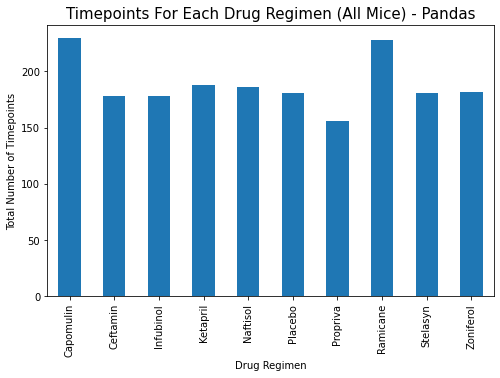

<Figure size 432x288 with 0 Axes>

In [414]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
drug_and_timepoints = drug_regimen_gr[["Timepoint"]]

drug_and_timepoints.plot(kind="bar", figsize=(8, 5), legend = False)

plt.title(("Timepoints For Each Drug Regimen (All Mice) - Pandas"),fontsize=15)
plt.ylabel("Total Number of Timepoints")

plt.show()
plt.tight_layout()





<BarContainer object of 10 artists>

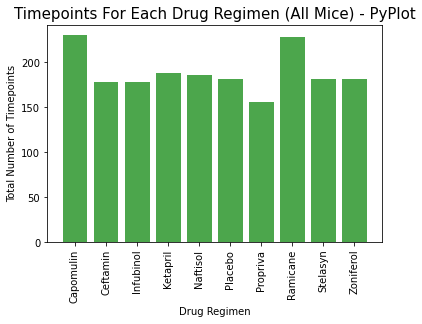

In [415]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.

x_axis = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10] 
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, ["Capomulin", "Ceftamin", "Infubinol", 
                            "Ketapril", "Naftisol", "Placebo", 
                            "Propriva", "Ramicane", "Stelasyn", "Zoniferol"]
                            , rotation='vertical')

y_axis = gr_summary_regimen_df['Timepoint'].count()

# Give our chart some labels and a tile
plt.title(("Timepoints For Each Drug Regimen (All Mice) - PyPlot"),fontsize=15)
plt.xlabel("Drug Regimen")
plt.ylabel("Total Number of Timepoints")

plt.bar(x_axis, y_axis, color='g', alpha=0.7, align="center")

###  Generate a pie plot showing the distribution of female versus male mice using Pandas

In [416]:
# groupby the master dataframe "cleaned_mouse_data_merged_df" into Sex

gr_sex_all_df = cleaned_mouse_data_merged_df.groupby(["Sex"])
gr_sex_all_df.count().head()

,Mouse ID,Timepoint,Tumour Volume (mm3),Metastatic Sites,Drug Regimen,Age_months,Weight (g),Duplicated_Entry
Sex,,,,,,,,
Female,930,930,930,930,930,930,930,930
Male,958,958,958,958,958,958,958,958


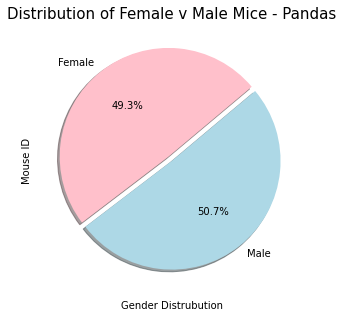

In [417]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas

index = gr_sex_all_df["Sex"].unique()

sex = gr_sex_all_df["Mouse ID"].count()


# Give our chart some labels and a tile
plt.title(("Distribution of Female v Male Mice - Pandas"),fontsize=15)
plt.xlabel("Gender Distrubution")
#plt.ylabel("")

series.plot.pie(explode = (0.05, 0), colors=["pink", "lightblue"],autopct="%.1f%%",figsize=(5, 5),shadow=True, startangle=40);


### Generate a pie plot showing the distribution of female versus male mice using pyplot

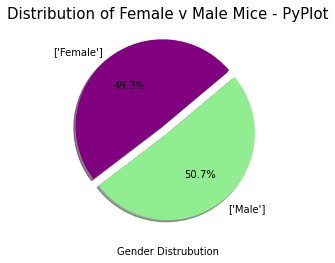

In [418]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

index_2 = gr_sex_all_df["Sex"].unique()

sex_2 = gr_sex_all_df["Mouse ID"].count()

# Automatically finds the percentages of each part of the pie chart
plt.pie(sex_2, explode=(0.1, 0), labels=index_2, colors=["purple", "lightgreen"],autopct="%1.1f%%", shadow=True, startangle=40)
plt.savefig("Gender.png")

# Give our chart some labels and a tile
plt.title(("Distribution of Female v Male Mice - PyPlot"),fontsize=15)
plt.xlabel("Gender Distrubution")
#plt.ylabel("Total Number of Timepoints")

plt.show()

## Quartiles, Outliers and Boxplots

In [451]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse

mouse_id_df = cleaned_mouse_data_merged_df.groupby(["Mouse ID"])
timepoint_max = mouse_id_df["Timepoint"].max()
#rename_timepoint_max = timepoint_max.rename(columns={"Timepoint":"Max Timepoint"})
timepoint_max.head()
#rename_timepoint_max.head(20)

# Merge this group df with the original dataframe to get the tumour volume at the last timepoint

merged_timepoint_max_df= pd.merge(cleaned_mouse_data_merged_df, timepoint_max, on="Mouse ID", how="left")
rename_timepoint_max_df = merged_timepoint_max_df.rename(columns={"Timepoint_y":"Max Timepoint", "Timepoint_x":"Timepoint"})
rename_timepoint_max_df.tail(5)



,Mouse ID,Timepoint,Tumour Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g),Duplicated_Entry,Max Timepoint
1883,r944,45,41.581521,2,Capomulin,Male,12,25,False,45
1884,u364,45,31.023923,3,Capomulin,Male,18,17,False,45
1885,p438,45,61.433892,1,Ceftamin,Female,11,26,False,45
1886,x773,45,58.634971,4,Placebo,Female,21,30,False,45
1887,b879,45,72.555239,2,Stelasyn,Female,4,26,False,45


In [458]:
# Put treatments into a list for for loop (and later for plot labels)

treatment_list = rename_timepoint_max_df["Drug Regimen"].unique()
treatment_list

# Create empty list to fill with tumour vol data (for plotting)

tumour_vol_data = []
tumour_vol_data

part1_df = cleaned_mouse_data_merged_df.groupby(["Drug Regimen"])
part2_df = part1_df["Timepoint"] 

part1_df

#print(gr_summary_regimen_df)
#gr_summary_regimen_df.count().head(15)




# Calculate the IQR and quantitatively determine if there are any potential outliers. 


    
    # Locate the rows which contain mice on each drug and get the tumour volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

In [421]:
# Generate a box plot of the final tumour volume of each mouse across four regimens of interest


## Line and Scatter Plots

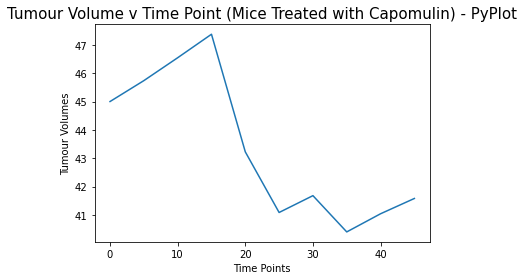

In [422]:
# Generate a line plot of tumour volume vs. time point for a mouse treated with Capomulin
#r944 selected

r944_data = cleaned_mouse_data_merged_df.loc[cleaned_mouse_data_merged_df["Mouse ID"] == "r944"]
r944_data
x_axis = r944_data["Timepoint"]
tv_data = r944_data["Tumour Volume (mm3)"]

# Give our chart some labels and a tile
plt.title(("Tumour Volume v Time Point (Mice Treated with Capomulin) - PyPlot"),fontsize=15)
plt.xlabel("Time Points")
plt.ylabel("Tumour Volumes")

# Plot the line
plt.plot(x_axis, tv_data)
plt.show()

In [423]:
capomulin_data = cleaned_mouse_data_merged_df.loc[cleaned_mouse_data_merged_df["Drug Regimen"] == "Capomulin"]
capomulin_data_avg = capomulin_data.groupby(["Mouse ID"]).mean() 
#capomulin_data
#capomulin_data_avg

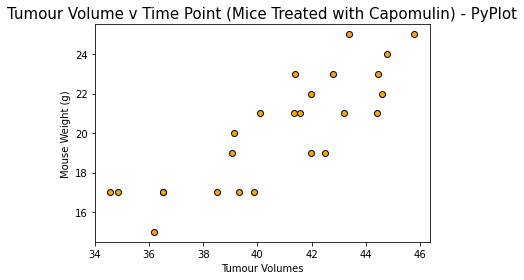

In [424]:
# Generate a scatter plot of average tumour volume vs. mouse weight for the Capomulin regimen

#capomulin_data = cleaned_mouse_data_merged_df.loc[cleaned_mouse_data_merged_df["Drug Regimen"] == "Capomulin"]

capomulin_atv = capomulin_data_avg["Tumour Volume (mm3)"]
capomulin_weight = capomulin_data_avg["Weight (g)"]

# Give our chart some labels and a tile
plt.title(("Tumour Volume v Time Point (Mice Treated with Capomulin) - PyPlot"),fontsize=15)
plt.ylabel("Mouse Weight (g)")
plt.xlabel("Tumour Volumes")


plt.scatter(capomulin_atv, capomulin_weight, marker="o", facecolors="orange", edgecolors="black")


## Correlation and Regression

In [425]:
# Calculate the correlation coefficient 
# for mouse weight and average tumour volume for the Capomulin regimen

print(f"The correlation coefficient between mouse weight and average tumour volume for the Capomulin treatment is {round(st.pearsonr(capomulin_atv,capomulin_weight)[0],2)}")


The correlation coefficient between mouse weight and average tumour volume for the Capomulin treatment is 0.84


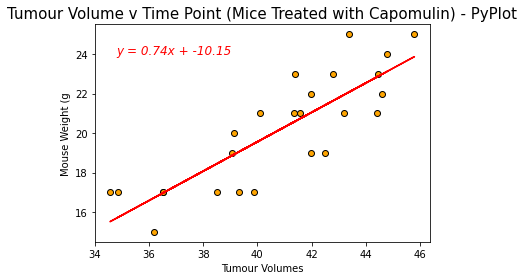

In [426]:
# Calculate the linear regression
# for mouse weight and average tumour volume for the Capomulin regimen

x_values = capomulin_data_avg["Tumour Volume (mm3)"]
y_values = capomulin_data_avg["Weight (g)"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values, y_values, marker="o", facecolors="orange", edgecolors="black")
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(34.8,24),fontsize=12, fontstyle="italic", color="red")
plt.title(("Tumour Volume v Time Point (Mice Treated with Capomulin) - PyPlot"),fontsize=15)
plt.xlabel('Tumour Volumes')
plt.ylabel('Mouse Weight (g')
plt.show()

